In [3]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir


,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [4]:
grd.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [5]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHA_ALTA',
       'TIPO_ALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA',
       'NOMBRE_HOSPITAL'],
      dtype='object')

In [6]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [7]:
#Vemos quienes murieron y creamos una columna boinaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f.head(5)

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0


In [8]:
# Se definen los rangos etarios (utilizando un valor menor a 0 para que se consideren valores = 0)
bins = [-0.1, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Crear una nueva columna con los rangos etarios
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
1        22.0          Juventud
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0  Primera infancia
...       ...               ...
1039582  27.0           Adultez
1039583  32.0           Adultez
1039584   9.0          Infancia
1039585   9.0          Infancia
1039586  72.0     Persona mayor

[1039587 rows x 2 columns]


In [9]:
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO',
       'AGE_GROUP'],
      dtype='object')

In [10]:
grd_f.dtypes

COD_HOSPITAL              int64
NOMBRE_HOSPITAL          object
CIP_ENCRIPTADO          float64
SEXO                     object
FECHA_NACIMIENTO         object
SERVICIO_SALUD           object
TIPO_INGRESO             object
FECHA_INGRESO            object
FECHA_ALTA               object
TIPO_ALTA                object
DIAGNOSTICO1             object
NOMBRE_IR                object
IR_29301_COD_GRD        float64
IR_29301_PESO           float64
IR_29301_SEVERIDAD      float64
IR_29301_MORTALIDAD     float64
EDAD                    float64
DIAS_ESTANCIA             int64
FALLECIDO                 int32
AGE_GROUP              category
dtype: object

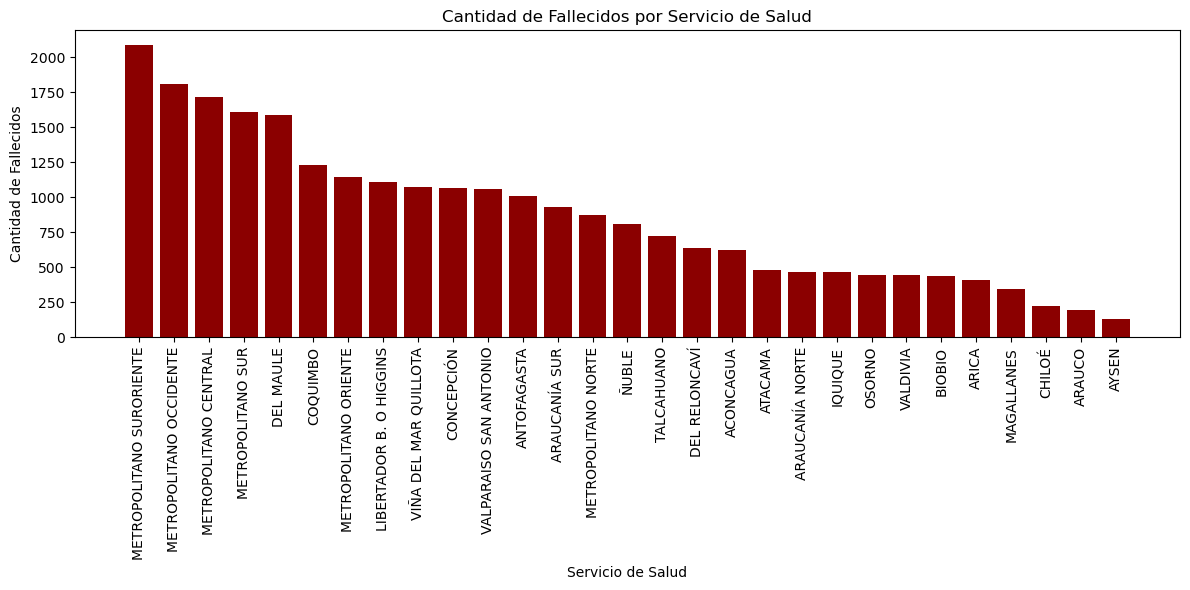

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar y contar fallecidos por SERVICIO_SALUD
fallecidos_por_servicio = grd_f.groupby('SERVICIO_SALUD')['FALLECIDO'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_servicio.index, fallecidos_por_servicio.values, color='darkred')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


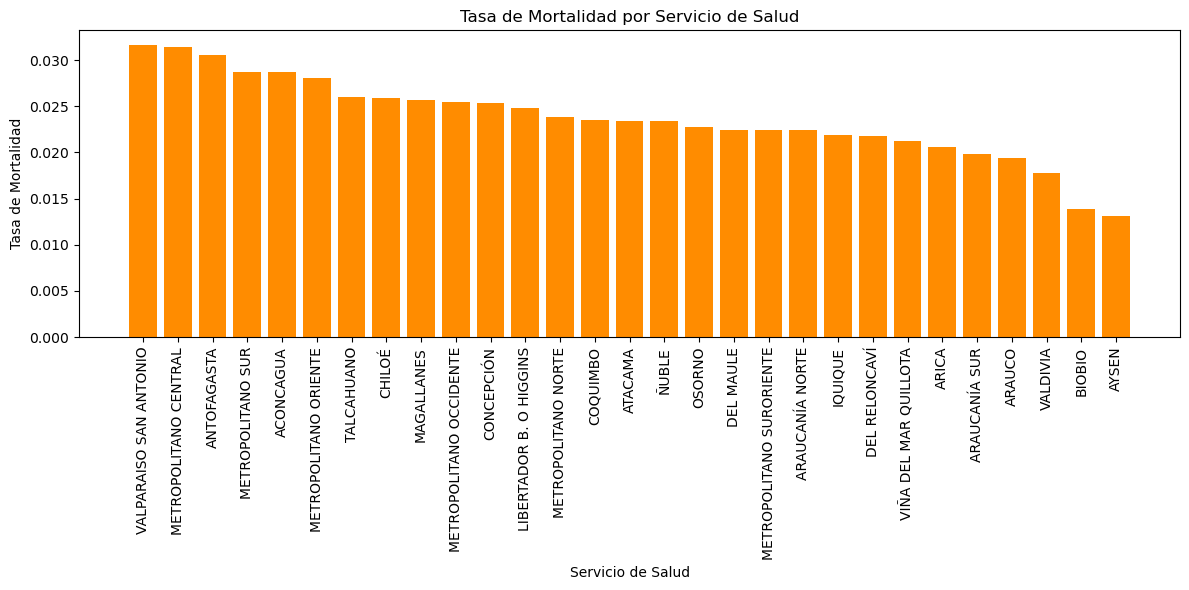

In [12]:
# Agrupar por SERVICIO_SALUD: sumar fallecidos y contar total de pacientes
grupo_servicio = grd_f.groupby('SERVICIO_SALUD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad y ordenar de mayor a menor
grupo_servicio['tasa_mortalidad'] = grupo_servicio['fallecidos'] / grupo_servicio['total']
grupo_servicio_sorted = grupo_servicio.sort_values(by='tasa_mortalidad', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(grupo_servicio_sorted.index, grupo_servicio_sorted['tasa_mortalidad'], color='darkorange')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [13]:
grd_f = grd_f.dropna()

In [14]:
def proc(i):
    u = (i.strip().split())[0]
    return u

In [15]:
grd_f["AH"] = grd_f["NOMBRE_IR"].apply(lambda x: proc(x))

In [16]:
grd_f.drop(["COD_HOSPITAL","NOMBRE_HOSPITAL","CIP_ENCRIPTADO", "SERVICIO_SALUD" ,"FECHA_NACIMIENTO",
        "FECHA_INGRESO","FECHA_ALTA", 'IR_29301_SEVERIDAD','IR_29301_MORTALIDAD'
        ,'IR_29301_COD_GRD', 'IR_29301_PESO',"TIPO_ALTA", "NOMBRE_IR", "DIAGNOSTICO1",], axis=1, inplace= True)

In [17]:
grd_f

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP,AH
0,HOMBRE,URGENCIA,43.0,2,0,Adultez,MH
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia,MH
3,MUJER,PROGRAMADA,45.0,1,0,Adultez,PH
4,MUJER,URGENCIA,0.0,2,0,Primera infancia,MH
5,MUJER,PROGRAMADA,58.0,0,0,Adultez,PA
...,...,...,...,...,...,...,...
1039582,MUJER,OBSTETRICA,27.0,3,0,Adultez,PH
1039583,MUJER,PROGRAMADA,32.0,0,0,Adultez,PA
1039584,HOMBRE,URGENCIA,9.0,2,0,Infancia,PH
1039585,HOMBRE,PROGRAMADA,9.0,0,0,Infancia,MH


In [18]:
grd_f["DIAS_ESTANCIA"].max()

696

In [19]:
grd_f.head()

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP,AH
0,HOMBRE,URGENCIA,43.0,2,0,Adultez,MH
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia,MH
3,MUJER,PROGRAMADA,45.0,1,0,Adultez,PH
4,MUJER,URGENCIA,0.0,2,0,Primera infancia,MH
5,MUJER,PROGRAMADA,58.0,0,0,Adultez,PA


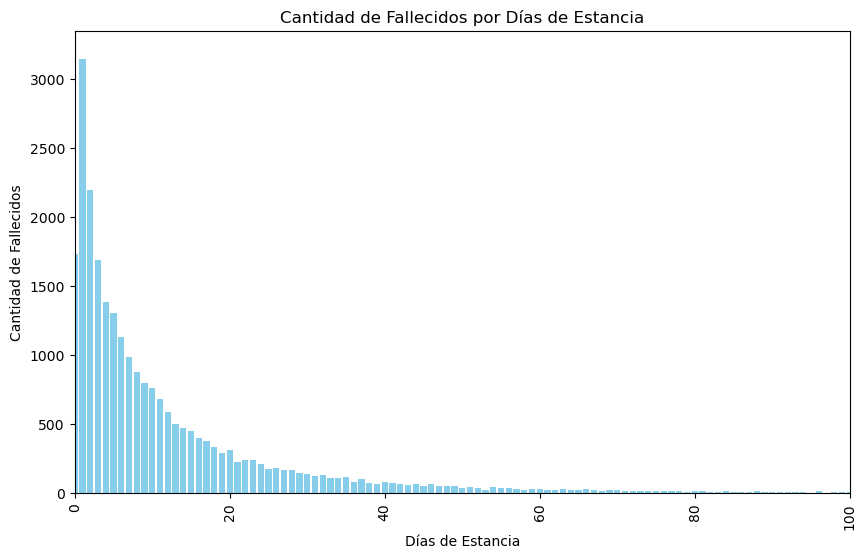

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA y contar la cantidad de fallecidos para cada grupo
fallecidos_por_dia = grd_f.groupby('DIAS_ESTANCIA')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(fallecidos_por_dia['DIAS_ESTANCIA'], fallecidos_por_dia['FALLECIDO'], color='skyblue')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Cantidad de Fallecidos')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de fallecidos)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, fallecidos_por_dia['FALLECIDO'].max()+200)  # Limitar el eje Y al máximo de fallecidos

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()




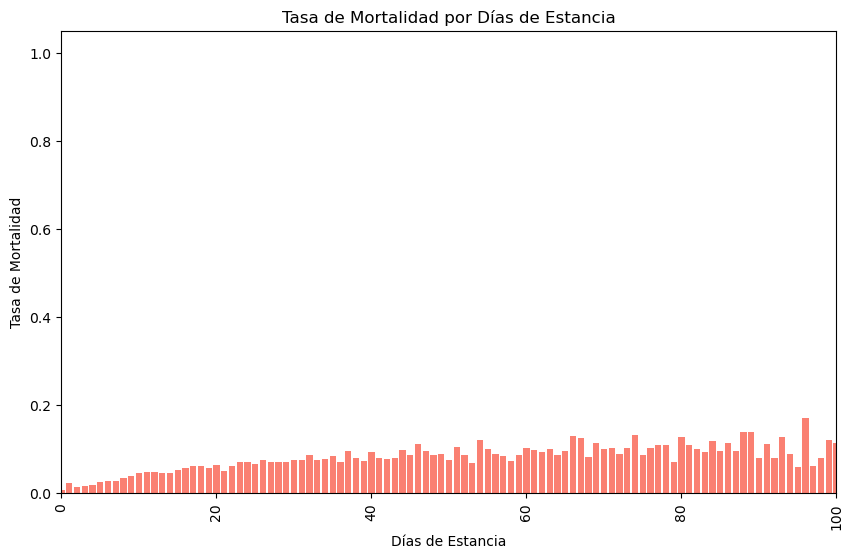

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA
grupo_dias = grd_f.groupby('DIAS_ESTANCIA').agg(
    fallecidos=('FALLECIDO', 'sum'),  # Sumar los fallecidos (1 = fallecido)
    total_pacientes=('FALLECIDO', 'count')  # Contar el total de pacientes
).reset_index()

# Calcular la tasa de mortalidad
grupo_dias['tasa_mortalidad'] = grupo_dias['fallecidos'] / grupo_dias['total_pacientes']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grupo_dias['DIAS_ESTANCIA'], grupo_dias['tasa_mortalidad'], color='salmon')

# Añadir etiquetas y título
plt.title('Tasa de Mortalidad por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Mortalidad')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de tasa de mortalidad)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, grupo_dias['tasa_mortalidad'].max() + 0.05)  # Limitar el eje Y hasta el máximo de la tasa de mortalidad

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()


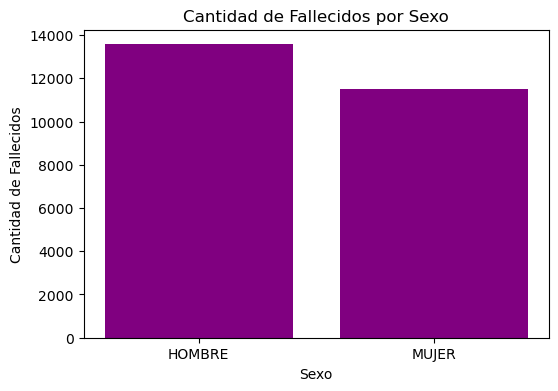

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO y sumar los fallecidos
fallecidos_por_sexo = grd_f.groupby('SEXO')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(fallecidos_por_sexo['SEXO'], fallecidos_por_sexo['FALLECIDO'], color='purple')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar el gráfico
plt.show()


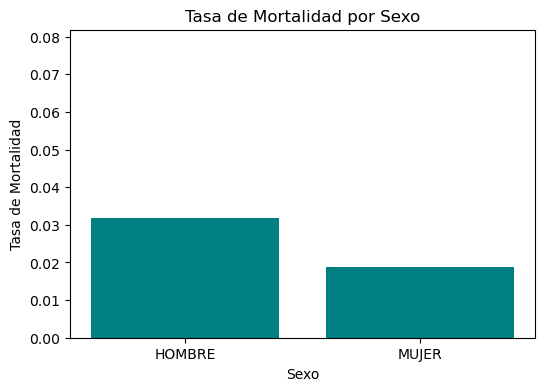

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO: sumar fallecidos y contar total de pacientes
grupo_sexo = grd_f.groupby('SEXO').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
).reset_index()

# Calcular la tasa de mortalidad
grupo_sexo['tasa_mortalidad'] = grupo_sexo['fallecidos'] / grupo_sexo['total']

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(grupo_sexo['SEXO'], grupo_sexo['tasa_mortalidad'], color='teal')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Mortalidad')

# Mostrar gráfico
plt.ylim(0, grupo_sexo['tasa_mortalidad'].max() + 0.05)
plt.show()


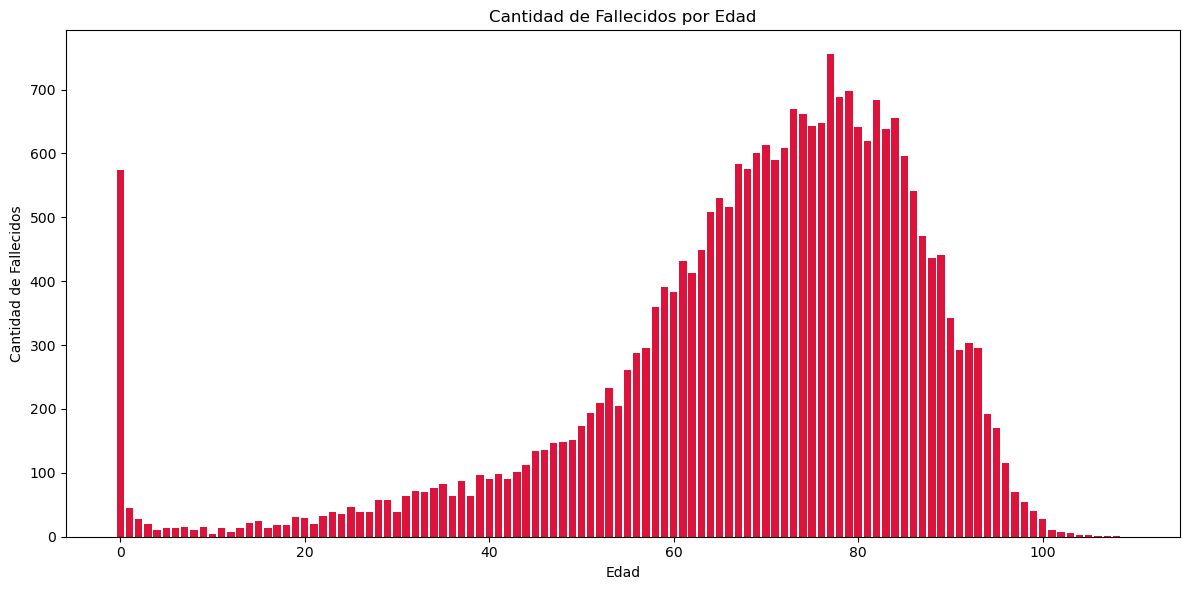

In [24]:
import matplotlib.pyplot as plt

# Agrupar por edad: contar fallecidos (1 = fallecido, 0 = no)
fallecidos_por_edad = grd_f.groupby('EDAD')['FALLECIDO'].sum()

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_edad.index, fallecidos_por_edad.values, color='crimson')

# Etiquetas
plt.title('Cantidad de Fallecidos por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar gráfico
plt.tight_layout()
plt.show()


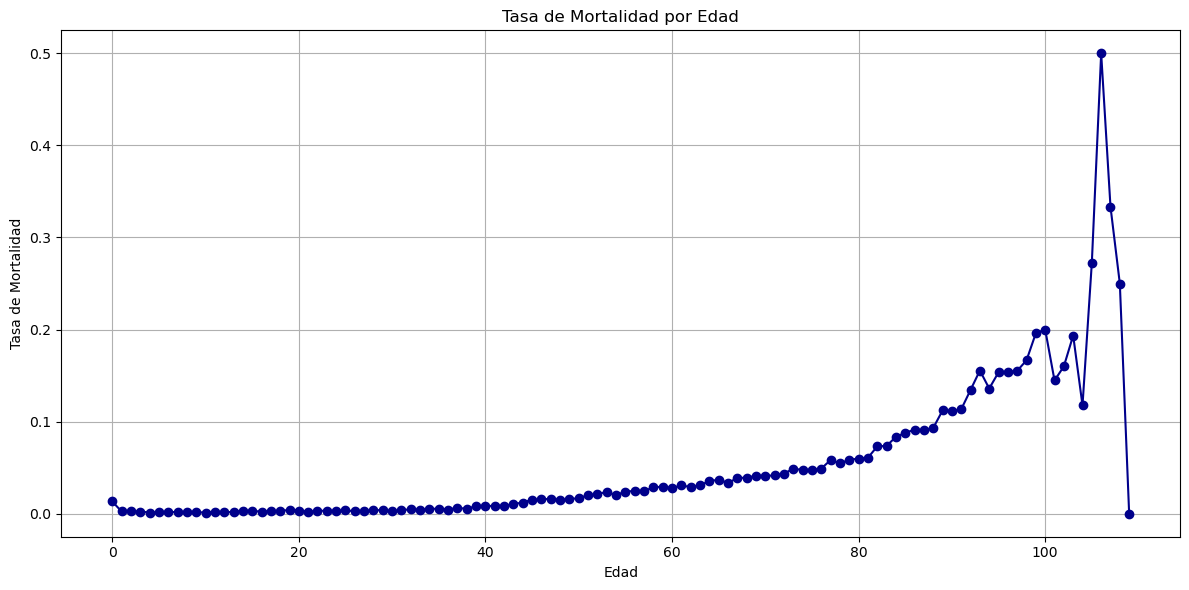

In [25]:
import matplotlib.pyplot as plt

# Agrupar por edad: sumar fallecidos y contar total de pacientes
grupo_edad = grd_f.groupby('EDAD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad
grupo_edad['tasa_mortalidad'] = grupo_edad['fallecidos'] / grupo_edad['total']

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(grupo_edad.index, grupo_edad['tasa_mortalidad'], marker='o', linestyle='-', color='darkblue')

# Etiquetas
plt.title('Tasa de Mortalidad por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Mortalidad')
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()


C:\Users\joaco\AppData\Local\Temp\ipykernel_19624\3529823745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()


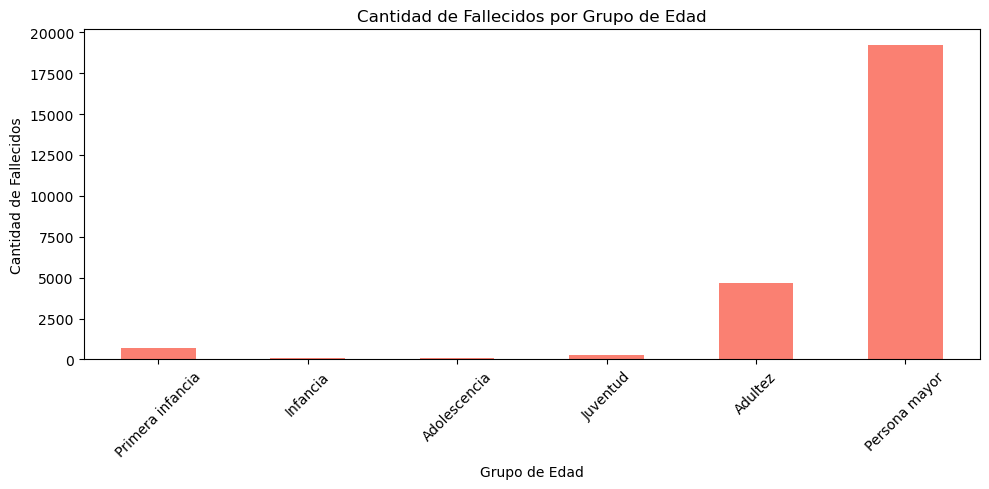

In [26]:
# Agrupar por grupo de edad y contar fallecidos
fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()

# Graficar
plt.figure(figsize=(10, 5))
fallecidos_por_grupo.plot(kind='bar', color='salmon')

plt.title('Cantidad de Fallecidos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\joaco\AppData\Local\Temp\ipykernel_19624\1763451484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = grd_f.groupby('AGE_GROUP').agg(


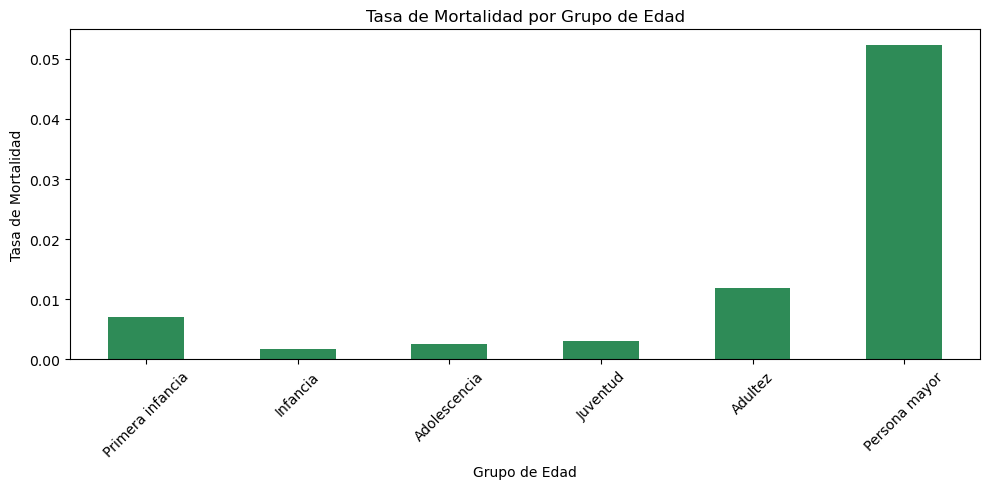

In [27]:
# Agrupar por grupo de edad y calcular fallecidos y total de pacientes
grupo = grd_f.groupby('AGE_GROUP').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular la tasa
grupo['tasa_mortalidad'] = grupo['fallecidos'] / grupo['total']

# Graficar
plt.figure(figsize=(10, 5))
grupo['tasa_mortalidad'].plot(kind='bar', color='seagreen')

plt.title('Tasa de Mortalidad por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


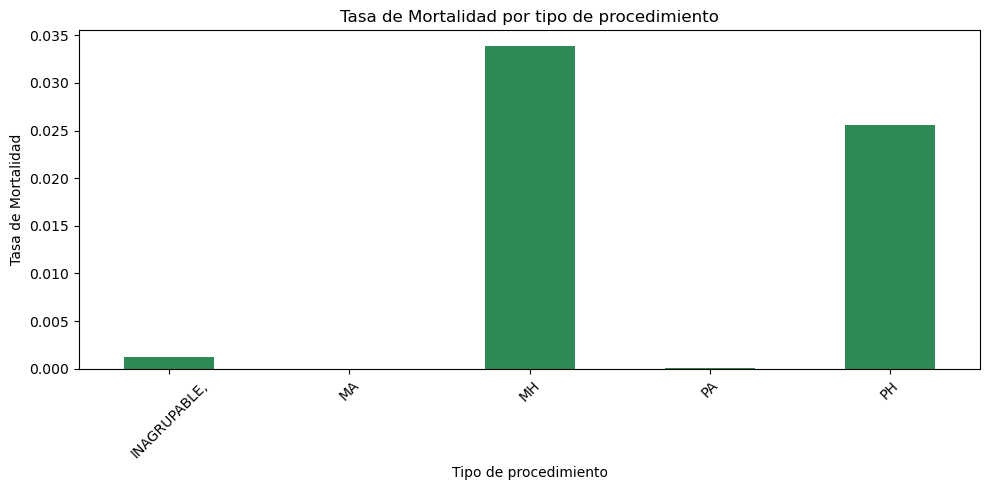

In [28]:
#Muertes por tipo de procedimiento
grupo = grd_f.groupby('AH').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular la tasa
grupo['tasa_mortalidad'] = grupo['fallecidos'] / grupo['total']

# Graficar
plt.figure(figsize=(10, 5))
grupo['tasa_mortalidad'].plot(kind='bar', color='seagreen')

plt.title('Tasa de Mortalidad por tipo de procedimiento')
plt.xlabel('Tipo de procedimiento')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Borramos las columnas que no tengan incidencia aparente sobre la muerte del paciente

Ahora aplicamos un Kmean para determinar un grupo con alta tasa de mortalidad, de tal manera reducir el alcance, y trabajar con un grupo con datos de muerte más balanceados.

In [29]:
grd_f.columns

Index(['SEXO', 'TIPO_INGRESO', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO',
       'AGE_GROUP', 'AH'],
      dtype='object')

In [30]:
#Ya que tomamos en cuenta la edad, no es necesario considerar el Age Group
grd_f.drop("AGE_GROUP", axis = 1, inplace = True)

In [31]:
grd_dummies = pd.get_dummies(grd_f)

In [32]:
grd_dummies

,EDAD,DIAS_ESTANCIA,FALLECIDO,SEXO_HOMBRE,SEXO_MUJER,TIPO_INGRESO_OBSTETRICA,TIPO_INGRESO_PROGRAMADA,TIPO_INGRESO_URGENCIA,"AH_INAGRUPABLE,",AH_MA,AH_MH,AH_PA,AH_PH
0,43.0,2,0,True,False,False,False,True,False,False,True,False,False
2,3.0,1,0,True,False,False,False,True,False,False,True,False,False
3,45.0,1,0,False,True,False,True,False,False,False,False,False,True
4,0.0,2,0,False,True,False,False,True,False,False,True,False,False
5,58.0,0,0,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,27.0,3,0,False,True,True,False,False,False,False,False,False,True
1039583,32.0,0,0,False,True,False,True,False,False,False,False,True,False
1039584,9.0,2,0,True,False,False,False,True,False,False,False,False,True
1039585,9.0,0,0,True,False,False,True,False,False,False,True,False,False


Para calcular el numero ópitmo de clusters, usamos el método del codo. Para esto, hay que cambiar los booleanos 

In [33]:
grd_dummies.dtypes

EDAD                       float64
DIAS_ESTANCIA                int64
FALLECIDO                    int32
SEXO_HOMBRE                   bool
SEXO_MUJER                    bool
TIPO_INGRESO_OBSTETRICA       bool
TIPO_INGRESO_PROGRAMADA       bool
TIPO_INGRESO_URGENCIA         bool
AH_INAGRUPABLE,               bool
AH_MA                         bool
AH_MH                         bool
AH_PA                         bool
AH_PH                         bool
dtype: object

In [34]:
grd_dummies.columns

Index(['EDAD', 'DIAS_ESTANCIA', 'FALLECIDO', 'SEXO_HOMBRE', 'SEXO_MUJER',
       'TIPO_INGRESO_OBSTETRICA', 'TIPO_INGRESO_PROGRAMADA',
       'TIPO_INGRESO_URGENCIA', 'AH_INAGRUPABLE,', 'AH_MA', 'AH_MH', 'AH_PA',
       'AH_PH'],
      dtype='object')

In [35]:
grd_dummies_stand = grd_dummies[['EDAD', 'DIAS_ESTANCIA', 'FALLECIDO', 'SEXO_HOMBRE', 'SEXO_MUJER',
       'TIPO_INGRESO_OBSTETRICA', 'TIPO_INGRESO_PROGRAMADA',
       'TIPO_INGRESO_URGENCIA', 'AH_INAGRUPABLE,', 'AH_MA', 'AH_MH', 'AH_PA',
       'AH_PH']].astype(float)

Para disminuir el alcance del trabajo, se pueden armar clusters, y elegir un grupo específico de personas sobre los cuales armar un modelo con datos balanceados.
Para esto, necesitamos saber un número óptimo de clusters. Calculamos este valor óptimo utilizando el método del codo.

In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [37]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

X = grd_dummies_stand
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\clust

KeyboardInterrupt: 

Distortion values:
1 : 815.4332674421556
2 : 320.75323869926757
3 : 234.18884330908745
4 : 170.02036040884323
5 : 132.4865268801372
6 : 108.43107273032507
7 : 93.68458221576418
8 : 80.18112059844192
9 : 70.84879812755221
10 : 62.98796784103359
11 : 57.35704254361305
12 : 52.698706986537026
13 : 48.55164204883706
14 : 45.255215278830484


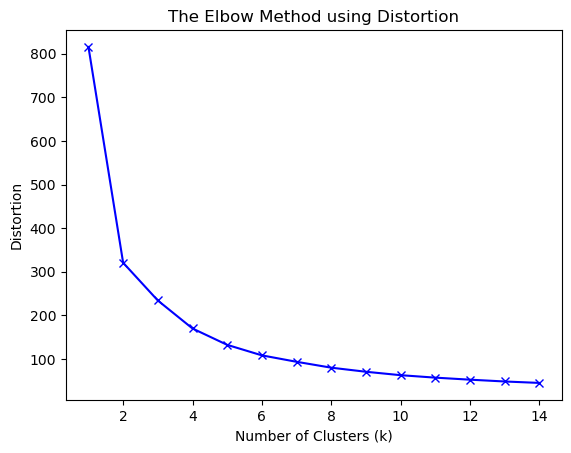

In [52]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 845668717.5655957
2 : 332646448.0370624
3 : 242872331.43011516
4 : 176324545.35244244
5 : 137398994.8102963
6 : 112451588.4761045
7 : 97158312.83971605
8 : 83154156.36910905
9 : 73475800.71331559
10 : 65323498.70058949
11 : 59483784.32406021
12 : 54652722.3429116
13 : 50351888.384404816
14 : 46933233.40616696


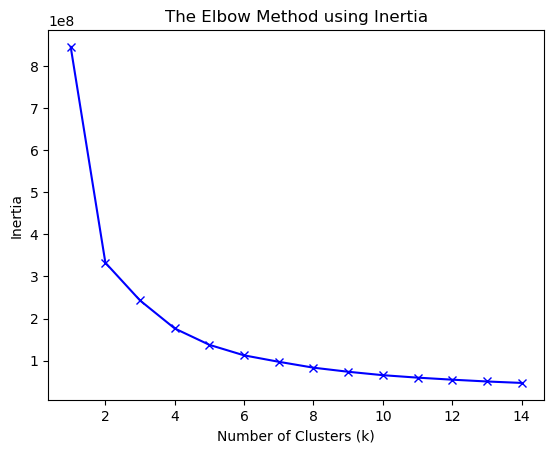

In [ ]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Tras utilizar el método del codo, podemos ver que los la inercia después de 5 o 6 clusters disminuye de manera significativa. Por ende, trabajaremos con 6 clusters.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separar fallecidos y no fallecidos
df_f = grd_dummies_stand[grd_dummies_stand['FALLECIDO'] == 1]
df_nf = grd_dummies_stand[grd_dummies_stand['FALLECIDO'] == 0].sample(n=len(df_f), random_state=42)

# Unir ambos para un set balanceado
df_bal = pd.concat([df_f, df_nf])

# Repetir clustering con set balanceado
X = df_bal.drop(columns=['FALLECIDO'])
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
df_bal['cluster'] = kmeans.fit_predict(X_scaled)

# Ver la proporción de fallecidos por cluster
cluster_fallecidos = df_bal.groupby("cluster")["FALLECIDO"].mean()
print(cluster_fallecidos)


c:\Users\joaco\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    0.630787
1    0.078423
2    0.625287
3    0.004849
4    0.042553
5    0.718737
Name: FALLECIDO, dtype: float64


Entonces, los clusters con una tasa de mortalidad sobre la cual se puede armar un modelo balanceado son los cluster 0, 2 y 5.